# Generar texto

## Importar librerías

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Importar datos

In [2]:
data="For a while there, it was rough \n But lately, I have been doing better \n Than the last four cold Decembers \n I recall \n And I see my family every month \n I found a girl my parents love \n She will come and stay the night \n And I think I might have it all"
corpus = data.lower().split("\n") # Es una canción por lo que lo separamos en líneas
print(corpus)

['for a while there, it was rough ', ' but lately, i have been doing better ', ' than the last four cold decembers ', ' i recall ', ' and i see my family every month ', ' i found a girl my parents love ', ' she will come and stay the night ', ' and i think i might have it all']


## Tokenizar

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [4]:
print(tokenizer.word_index)

{'i': 1, 'and': 2, 'a': 3, 'it': 4, 'have': 5, 'the': 6, 'my': 7, 'for': 8, 'while': 9, 'there': 10, 'was': 11, 'rough': 12, 'but': 13, 'lately': 14, 'been': 15, 'doing': 16, 'better': 17, 'than': 18, 'last': 19, 'four': 20, 'cold': 21, 'decembers': 22, 'recall': 23, 'see': 24, 'family': 25, 'every': 26, 'month': 27, 'found': 28, 'girl': 29, 'parents': 30, 'love': 31, 'she': 32, 'will': 33, 'come': 34, 'stay': 35, 'night': 36, 'think': 37, 'might': 38, 'all': 39}


Vamos a hacer algo parecido a lo siguiente:

yo estoy usando Tensorflow

yo ---> estoy

yo estoy ---> usando

yo estoy usando ---> Tensorflow


In [5]:
# Tokeniza las palabras del dataset
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    sub_sequence = token_list[:i+1]
    input_sequences.append(sub_sequence)

max_sequence_len = max(len(x) for x in input_sequences) # Obtiene el número máximo de tokens por secuencia
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
sentence = corpus[1].split()
print(f"Sample sentence: {sentence}")

token_list = []
for word in sentence:
  token_list.append(tokenizer.word_index[word])

print(token_list)

Sample sentence: ['but', 'lately,', 'i', 'have', 'been', 'doing', 'better']


KeyError: 'lately,'

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=7),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48)),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 64)             2560      
                                                                 
 bidirectional (Bidirection  (None, 96)                43392     
 al)                                                             
                                                                 
 dense (Dense)               (None, 36)                3492      
                                                                 
 dense_1 (Dense)             (None, 40)                1480      
                                                                 
Total params: 50924 (198.92 KB)
Trainable params: 50924 (198.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(xs, ys, epochs=100)

Epoch 1/100


2/2 [==============================] - 15s 14ms/step - loss: 3.6912 - accuracy: 0.0233
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 3.6854 - accuracy: 0.0930
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 3.6817 - accuracy: 0.1163
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 3.6782 - accuracy: 0.1163
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 3.6742 - accuracy: 0.1163
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 3.6695 - accuracy: 0.1163
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 3.6645 - accuracy: 0.1163
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 3.6588 - accuracy: 0.1163
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 3.6519 - accuracy: 0.1163
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 3.6457 - accuracy: 0.1163
Epoch 11/100
2/2 

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [10]:
history.history['accuracy']

[0.023255813866853714,
 0.09302325546741486,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.11627907305955887,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.09302325546741486,
 0.13953489065170288,
 0.13953489065170288,
 0.1627907007932663,
 0.1627907007932663,
 0.1627907007932663,
 0.1627907007932663,
 0.1627907007932663,
 0.1627907007932663,
 0.1860465109348297,
 0.20930232107639313,
 0.20930232107639313,
 0.23255814611911774,
 0.27906978130340576,
 0.27906978130340576,
 0.23255814611911774,
 0.23255814611911774,
 0.23255814611911774,
 0.23255814611911774,
 0.2325581461191

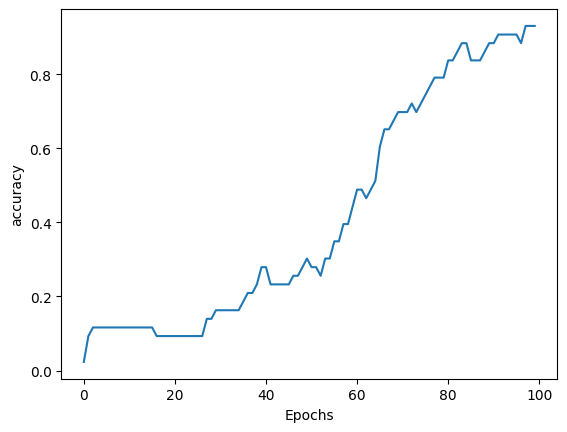

In [11]:
plot_graphs(history, 'accuracy')

### Predecir 3 palabras siguientes

In [20]:
seed_text = "than the last"
next_words = 3

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  probabilities = model.predict(token_list)
  predicted = np.argmax(probabilities, axis=-1)[0]
  if predicted != 0:
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word
    print(seed_text)

1/1 [==============================] - 0s 66ms/step
than the last four
1/1 [==============================] - 0s 62ms/step
than the last four cold
1/1 [==============================] - 0s 51ms/step
than the last four cold decembers


### Dara aleatoridad a la predicción

In [23]:
seed_text = "than the last"
next_words = 3

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  probabilities = model.predict(token_list)

  choice = np.random.choice([1,2,3])
  predicted = np.argsort(probabilities, axis=-1)[0][-choice]
  if predicted != 0:
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word
    print(seed_text)

1/1 [==============================] - 0s 60ms/step
than the last cold
1/1 [==============================] - 0s 63ms/step
than the last cold four
1/1 [==============================] - 0s 62ms/step
than the last cold four decembers
